In [1]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file
paysim = pd.read_csv('PS_20174392719_1491204439457_log.csv')

# Display the first few rows to verify
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
paysim.drop(columns=['isFlaggedFraud','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis=1, inplace=True)

# Display the first few rows to verify
paysim.head()

,step,type,amount,nameOrig,nameDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0
2,1,TRANSFER,181.00,C1305486145,C553264065,1
3,1,CASH_OUT,181.00,C840083671,C38997010,1
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0


In [4]:
paysim['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
# Separate the majority and minority classes
paysim_majority = paysim[paysim.isFraud == 0]
paysim_minority = paysim[paysim.isFraud == 1]

# Perform random undersampling on the majority class
paysim_majority_undersampled = paysim_majority.sample(n=len(paysim_minority), random_state=123)

# Combine the undersampled majority class with the minority class
paysim_undersampled = pd.concat([paysim_majority_undersampled, paysim_minority])

# Shuffle the resulting dataframe
paysim_balanced = paysim_undersampled.sample(frac=1, random_state=123).reset_index(drop=True)

# Display the new class distribution
display(paysim_balanced['isFraud'].value_counts())

0    8213
1    8213
Name: isFraud, dtype: int64

In [6]:
len(paysim_balanced['nameDest'].unique())

16251

In [7]:
paysim_balanced

,step,type,amount,nameOrig,nameDest,isFraud
0,305,CASH_IN,95791.60,C301657883,C680193376,0
1,467,CASH_OUT,171623.10,C859067773,C936547996,1
2,270,TRANSFER,14992.14,C925134065,C1757598776,1
3,178,CASH_OUT,763913.96,C743019474,C508327884,1
4,159,CASH_OUT,84758.97,C845519174,C1540948006,0
...,...,...,...,...,...,...
16421,155,TRANSFER,773450.97,C672074650,C1092318644,0
16422,465,CASH_OUT,1760061.57,C1907027988,C1368065448,1
16423,327,CASH_OUT,14480.67,C564379196,C1915991124,0
16424,648,CASH_OUT,1005346.72,C845487324,C1150675695,1


In [8]:
paysim_balanced['type'].unique()

array(['CASH_IN', 'CASH_OUT', 'TRANSFER', 'PAYMENT', 'DEBIT'],
      dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_type = LabelEncoder()
le_nameDest = LabelEncoder()

# Apply LabelEncoder to the 'type', 'nameOrig' and 'nameDest' columns
paysim_balanced['type'] = le_type.fit_transform(paysim_balanced['type'])
paysim_balanced['nameOrig'] = le_type.fit_transform(paysim_balanced['nameOrig'])
paysim_balanced['nameDest'] = le_nameDest.fit_transform(paysim_balanced['nameDest'])
display(paysim_balanced)

,step,type,amount,nameOrig,nameDest,isFraud
0,305,0,95791.60,10453,11202,0
1,467,1,171623.10,15193,12996,1
2,270,4,14992.14,15757,5166,1
3,178,1,763913.96,14211,9954,1
4,159,1,84758.97,15090,3683,0
...,...,...,...,...,...,...
16421,155,4,773450.97,13587,647,0
16422,465,1,1760061.57,7784,2452,1
16423,327,1,14480.67,12665,6317,0
16424,648,1,1005346.72,15088,1018,1


In [10]:
paysim_balanced['type'].unique()

array([0, 1, 4, 3, 2])

In [11]:
paysim_balanced.describe()

,step,type,amount,nameOrig,nameDest,isFraud
count,16426.000000,16426.000000,1.642600e+04,16426.000000,16426.000000,16426.000000
mean,305.866675,2.112626,8.234769e+05,8212.500000,8112.366797,0.500000
std,194.140237,1.480007,1.853023e+06,4741.922096,4685.490191,0.500015
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,161.000000,1.000000,3.625057e+04,4106.250000,4053.250000,0.000000
50%,283.000000,1.000000,1.716908e+05,8212.500000,8112.500000,0.500000
75%,409.000000,4.000000,5.483188e+05,12318.750000,12161.750000,1.000000
max,743.000000,4.000000,1.385793e+07,16425.000000,16250.000000,1.000000


In [12]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = paysim_balanced.drop(columns=['isFraud'])
y = paysim_balanced['isFraud']

# Initialize SMOTE
smote = SMOTE(random_state=123)

# Apply SMOTE to the features and target
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
paysim_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the new class distribution
print(paysim_resampled['isFraud'].value_counts())

0    8213
1    8213
Name: isFraud, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Step 1: Separate features (X) and target (y)
X = paysim_resampled.drop(columns=['isFraud'])
y = paysim_resampled['isFraud']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123, stratify=y)

# Step 3: Initialize the StandardScaler
scaler = StandardScaler()

# Step 4: Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Print the shape of the training and testing data
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (11498, 5)
Shape of X_test_scaled: (4928, 5)
Shape of y_train: (11498,)
Shape of y_test: (4928,)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
logreg_cv = LogisticRegression(solver='liblinear', random_state=123)
print("Test F1 Score: {}".format(cross_val_score(logreg_cv, X_train_scaled, y_train, cv=3, scoring='f1').mean()))

Test F1 Score: 0.7972038123248822


In [15]:
logreg_cv = LogisticRegression(solver='liblinear', random_state=111)
print("Test F1 Score: {}".format(cross_val_score(logreg_cv, X_train_scaled, y_train, cv=3, scoring='f1').mean()))

Test F1 Score: 0.7972038123248822


In [16]:
logreg_cv = LogisticRegression(solver='liblinear', random_state=120)
print("Test F1 Score: {}".format(cross_val_score(logreg_cv, X_train_scaled, y_train, cv=3, scoring='f1').mean()))

Test F1 Score: 0.7972038123248822


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X_train_scaled)
kmeans_labels = kmeans.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
kmeans_f1_score = f1_score(y_test, kmeans_labels, average='macro')
print("K-Means F1 Score: {}".format(kmeans_f1_score))

K-Means F1 Score: 0.5350230961301465


In [18]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(X_train_scaled)
kmeans_labels = kmeans.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
kmeans_f1_score = f1_score(y_test, kmeans_labels, average='macro')
print("K-Means F1 Score: {}".format(kmeans_f1_score))

K-Means F1 Score: 0.1747687356136617


In [19]:
# K-Means Clustering
kmeans = KMeans(n_clusters=10, random_state=123)
kmeans.fit(X_train_scaled)
kmeans_labels = kmeans.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
kmeans_f1_score = f1_score(y_test, kmeans_labels, average='macro')
print("K-Means F1 Score: {}".format(kmeans_f1_score))

K-Means F1 Score: 0.04232803722079577


In [20]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=120)
kmeans.fit(X_train_scaled)
kmeans_labels = kmeans.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
kmeans_f1_score = f1_score(y_test, kmeans_labels, average='macro')
print("K-Means F1 Score: {}".format(kmeans_f1_score))

K-Means F1 Score: 0.5350230961301465


In [21]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=111)
kmeans.fit(X_train_scaled)
kmeans_labels = kmeans.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
kmeans_f1_score = f1_score(y_test, kmeans_labels, average='macro')
print("K-Means F1 Score: {}".format(kmeans_f1_score))

K-Means F1 Score: 0.46348818784247686


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
xgb_classifier = XGBClassifier(random_state=123,verbose=2)
xgb_classifier.fit(X_train_scaled, y_train)
xgb_classifier_labels = xgb_classifier.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
xgb_classifier_f1_score = f1_score(y_test, xgb_classifier_labels, average='macro')
print("XG Boost F1 Score: {}".format(xgb_classifier_f1_score))

XG Boost F1 Score: 0.8965083595293528


In [23]:
xgb_classifier = XGBClassifier(random_state=120,verbose=2)
xgb_classifier.fit(X_train_scaled, y_train)
xgb_classifier_labels = xgb_classifier.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
xgb_classifier_f1_score = f1_score(y_test, xgb_classifier_labels, average='macro')
print("XG Boost F1 Score: {}".format(xgb_classifier_f1_score))

XG Boost F1 Score: 0.8965083595293528


In [24]:
xgb_classifier = XGBClassifier(random_state=111,verbose=2)
xgb_classifier.fit(X_train_scaled, y_train)
xgb_classifier_labels = xgb_classifier.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
xgb_classifier_f1_score = f1_score(y_test, xgb_classifier_labels, average='macro')
print("XG Boost F1 Score: {}".format(xgb_classifier_f1_score))

XG Boost F1 Score: 0.8965083595293528



XG Boost Classification Report:
               precision    recall  f1-score   support

           0     0.8936    0.9002    0.8969      2464
           1     0.8994    0.8929    0.8961      2464

    accuracy                         0.8965      4928
   macro avg     0.8965    0.8965    0.8965      4928
weighted avg     0.8965    0.8965    0.8965      4928



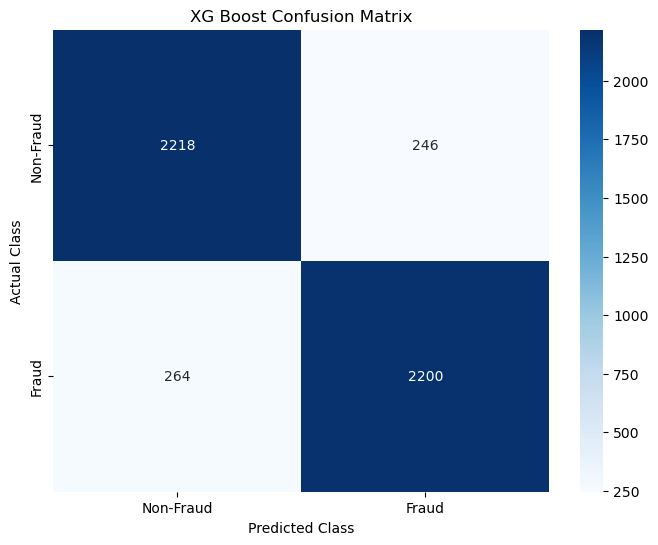

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Use the best estimator to make predictions
# best_xgboost = grid_search.best_estimator_
y_pred = xgb_classifier.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred, digits=4)
print("\nXG Boost Classification Report:\n", class_report)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("XG Boost Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'random_state': [111, 120, 123]
}

# Initialize the XGBClassifier (no need to set random_state here, it's in the grid)
xgb_model = XGBClassifier(verbosity=2)

# Initialize GridSearchCV with the XGBClassifier and parameter grid
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1',  # Using F1-score as the metric
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters found: ", grid_search.best_params_)
print("Best Cross-Validation F1 Score: ", grid_search.best_score_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'random_state': 120, 'subsample': 0.8}
Best Cross-Validation F1 Score:  0.8925461781655549



XG Boost Classification Report:
               precision    recall  f1-score   support

           0     0.8887    0.8945    0.8916      2464
           1     0.8938    0.8880    0.8909      2464

    accuracy                         0.8912      4928
   macro avg     0.8913    0.8912    0.8912      4928
weighted avg     0.8913    0.8912    0.8912      4928



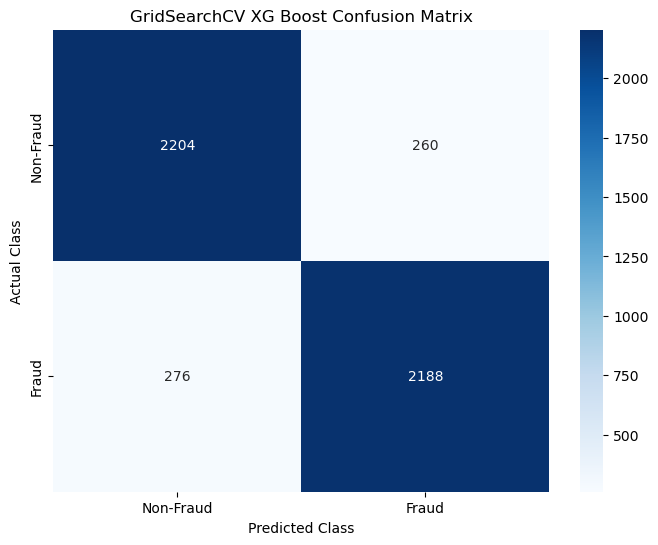

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Use the best estimator to make predictions
best_xgboost = grid_search.best_estimator_
y_pred = best_xgboost.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred, digits=4)
print("\nXG Boost Classification Report:\n", class_report)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("GridSearchCV XG Boost Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf_classifier = RandomForestClassifier(random_state=123,verbose=2)
rf_classifier.fit(X_train_scaled, y_train)
rf_classifier_labels = rf_classifier.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
rf_classifier_f1_score = f1_score(y_test, rf_classifier_labels, average='macro')
print("Random Forest F1 Score: {}".format(rf_classifier_f1_score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [29]:
rf_classifier = RandomForestClassifier(random_state=120,verbose=2)
rf_classifier.fit(X_train_scaled, y_train)
rf_classifier_labels = rf_classifier.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
rf_classifier_f1_score = f1_score(y_test, rf_classifier_labels, average='macro')
print("Random Forest F1 Score: {}".format(rf_classifier_f1_score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [30]:
rf_classifier = RandomForestClassifier(random_state=111,verbose=2)
rf_classifier.fit(X_train_scaled, y_train)
rf_classifier_labels = rf_classifier.predict(X_test_scaled)

# Assuming y_train_smote has the true labels for the clusters
rf_classifier_f1_score = f1_score(y_test, rf_classifier_labels, average='macro')
print("Random Forest F1 Score: {}".format(rf_classifier_f1_score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the RandomForestClassifier without a pipeline since data is already scaled
rf_classifier = RandomForestClassifier(verbose=2)

# Define the grid of parameters to search
param_grid = {'n_estimators': [3, 100, 200],'max_depth': [5, 10, 20],'min_samples_leaf': [1, 2, 3], 'random_state': [111,120,123]}

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier,param_grid=param_grid,cv=3,verbose=3,n_jobs=-1)

# Fit the grid search to the already scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters found: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished



Random Forest Classification Report:
               precision    recall  f1-score   support

           0     0.8780    0.8823    0.8802      2464
           1     0.8817    0.8774    0.8796      2464

    accuracy                         0.8799      4928
   macro avg     0.8799    0.8799    0.8799      4928
weighted avg     0.8799    0.8799    0.8799      4928



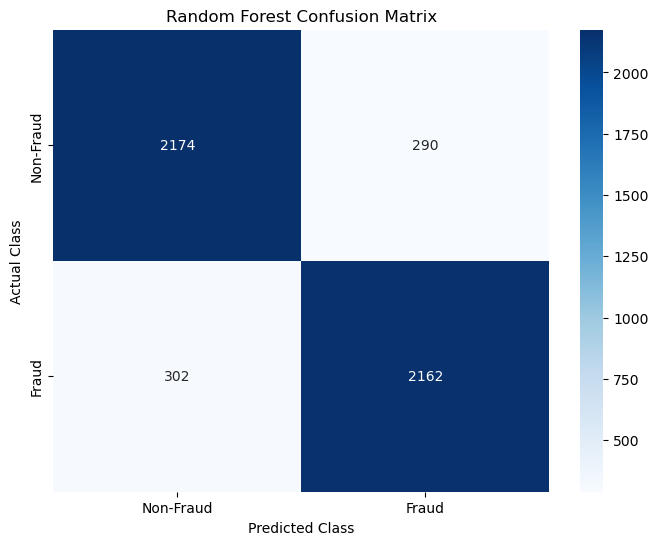

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Use the best estimator to make predictions
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred, digits=4)
print("\nRandom Forest Classification Report:\n", class_report)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Random Forest Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [33]:
## Overfitting Check

# Evaluate the model on the training data
y_train_pred = best_rf_classifier.predict(X_train_scaled)

# Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:\n", conf_matrix_train)

# Classification Report for Training Data
class_report_train = classification_report(y_train, y_train_pred, digits=4)
print("\nTraining Classification Report:\n", class_report_train)

Training Confusion Matrix:
 [[5163  586]
 [ 617 5132]]

Training Classification Report:
               precision    recall  f1-score   support

           0     0.8933    0.8981    0.8957      5749
           1     0.8975    0.8927    0.8951      5749

    accuracy                         0.8954     11498
   macro avg     0.8954    0.8954    0.8954     11498
weighted avg     0.8954    0.8954    0.8954     11498



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [34]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5, verbose=2)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.2s finished


In [35]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Filter out the rows where the predictions were incorrect
wrong_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

# Display the wrong predictions with actual and predicted labels side by side
display("Wrong Predictions:\n", wrong_predictions)

'Wrong Predictions:\n'

,Actual,Predicted
12908,1,0
1369,0,1
3016,0,1
6963,0,1
10615,1,0
...,...,...
10919,1,0
13995,0,1
12007,0,1
2585,1,0


In [36]:
len(wrong_predictions)

592